<a href="https://www.kaggle.com/code/thirumani/dragons-den-uk-data-analysis?scriptVersionId=193456951" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"), "with Python version")
!python --version

Notebook was last executed on: 2024-Aug-21 with Python version
Python 3.10.13


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/en/9/99/DragonsDenUK17.png', width=430, height=240)

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

In [4]:
! ls -l /kaggle/input/dragons-den-uk-dataset/
dragons_den = pd.read_csv('/kaggle/input/dragons-den-uk-dataset/Dragons Den UK dataset.csv', encoding = "ISO-8859-1")

nRow, nCol = dragons_den.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 28
-rw-r--r-- 1 nobody nogroup 27281 Aug 21 14:12 'Dragons Den UK dataset.csv'

There are 129 rows and 53 columns in the dataset


In [5]:
dragons_den.head(5)

Season Number                        Startup Name  Episode Number  \
0              1                            Umbrolly               1   
1              1                         Grails Ltd1               2   
2              1                          Le Beanock               3   
3              1  IV Cam, Industrial Control Systems               3   
4              1                 Mycorrhizal Systems               4   

   Pitch Number Season Start Season End Original Air Date        Industry  \
0             1     4-Jan-05   8-Feb-05          4-Jan-05             NaN   
1             2     4-Jan-05   8-Feb-05         11-Jan-05  Fashion/Beauty   
2             3     4-Jan-05   8-Feb-05         18-Jan-05             NaN   
3             4     4-Jan-05   8-Feb-05         18-Jan-05             NaN   
4             5     4-Jan-05   8-Feb-05         25-Jan-05             NaN   

                                Business Description  Company Website  \
0  Multimedia vending unit selling umbrellas and ...              NaN   
1                Tailor-made suits for businesswomen              NaN   
2                                  A beanbag hammock              NaN   
3      A 3D measuring system using camera technology              NaN   
4                            Land for a truffle farm              NaN   

   Pitchers Gender  Pitchers Average Age  Pitchers City  Pitchers State  \
0              NaN                   NaN            NaN             NaN   
1              NaN                   NaN            NaN             NaN   
2              NaN                   NaN            NaN             NaN   
3              NaN                   NaN            NaN             NaN   
4              NaN                   NaN            NaN             NaN   

       Entrepreneur Names  Multiple Entrepreneurs  UK Viewership  \
0           Charles Ejogo                       0            NaN   
1       Tracey Ann Graily                       0            NaN   
2         Tracie Herrtage                       0            NaN   
3  John and Phillip Petty                       1            NaN   
4             Paul Thomas                       0            NaN   

   Original Ask Amount  Original Offered Equity  Valuation Requested  \
0               150000                     40.0               375000   
1               120000                     40.0               300000   
2                54000                     49.0               110204   
3                50000                     30.0               166667   
4                75000                     25.0               300000   

   Got Deal  Total Deal Amount  Total Deal Equity  Deal Valuation  \
0         1           150000.0               40.0        375000.0   
1         1           120000.0               40.0        300000.0   
2         1            54000.0               49.0        110204.0   
3         0                NaN                NaN             NaN   
4         0                NaN                NaN             NaN   

   Number of Dragons in Deal  ...  Advisory Shares Equity  Loan  \
0                        2.0  ...                     NaN   NaN   
1                        2.0  ...                     NaN   NaN   
2                        1.0  ...                     NaN   NaN   
3                        NaN  ...                     NaN   NaN   
4                        NaN  ...                     NaN   NaN   

   Deal Has Conditions  Peter Jones Investment Amount  \
0                  NaN                        75000.0   
1                  NaN                            NaN   
2                  NaN                            NaN   
3                  NaN                            NaN   
4                  NaN                            NaN   

   Peter Jones Investment Equity Deborah Meaden Investment Amount  \
0                           20.0                              NaN   
1                            NaN                              NaN   
2      

In [6]:
dragons_den.tail(10).T

119  \
Season Number                                                                      10   
Startup Name                                                                   Zapper   
Episode Number                                                                      7   
Pitch Number                                                                      120   
Season Start                                                                 9-Sep-12   
Season End                                                                  27-Dec-12   
Original Air Date                                                           21-Oct-12   
Industry                                                                Software/Tech   
Business Description                Website which buys iPhones, iPads, electronics...   
Company Website                                                                   NaN   
Pitchers Gender                                                                   NaN   
Pitchers Average Age                                                              NaN   
Pitchers City                                                                     NaN   
Pitchers State                                                                    NaN   
Entrepreneur Names                                                      Ben Hardyment   
Multiple Entrepreneurs                                                              0   
UK Viewership                                                                     NaN   
Original Ask Amount                                                            250000   
Original Offered Equity                                                          30.0   
Valuation Requested                                                            833333   
Got Deal                                                                            0   
Total Deal Amount                                                                 NaN   
Total Deal Equity                                                                 NaN   
Deal Valuation                                                                    NaN   
Number of Dragons in Deal                                                         NaN   
Investment Amount Per Dragon                                                      NaN   
Equity Per Dragon                                                                 NaN   
Royalty Deal                                                                      NaN   
Advisory Shares Equity                                                            NaN   
Loan                                                                              NaN   
Deal Has Conditions                                                               NaN   
Peter Jones Investment Amount                                                     NaN   
Peter Jones Investment Equity                                                     NaN   
Deborah Meaden Investment Amount                                                  NaN   
Deborah Meaden Investment Equity                                                  NaN   
Duncan Bannatyne Investment Amount                                                NaN   
Duncan Bannatyne Investment Equity                                                NaN   
Theo Paphitis Investment Amount                                                   NaN   
Theo Paphitis Investment Equity                                                   NaN   
Touker Suleyman Investment Amount                                                 NaN   
Touker Suleyman Investment Equity                                                 NaN   
Sara Davies Investment Amount                                                     NaN   
Sara Davies Investment Equity                                                     NaN   
Guest Investment Amount                                                           NaN   
Guest Investment Equity                                                      

In [7]:
dragons_den['Season Number'] = dragons_den['Season Number'].astype(pd.Int32Dtype())
dragons_den['Episode Number'] = dragons_den['Episode Number'].astype(pd.Int32Dtype())
dragons_den['Pitch Number'] = dragons_den['Pitch Number'].astype(pd.Int32Dtype())

dragons_den['Startup Name'] = dragons_den['Startup Name'].astype(str)
dragons_den['Industry'] = dragons_den['Industry'].astype(str)
dragons_den['Business Description'] = dragons_den['Business Description'].astype(str)

dragons_den['Multiple Entrepreneurs'] = dragons_den['Multiple Entrepreneurs'].astype(pd.Int32Dtype())

In [8]:
dragons_den.sample(10).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1px solid black", 'font-size': '10pt'})

In [9]:
dragons_den.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Season Number                       129 non-null    Int32  
 1   Startup Name                        129 non-null    object 
 2   Episode Number                      129 non-null    Int32  
 3   Pitch Number                        129 non-null    Int32  
 4   Season Start                        129 non-null    object 
 5   Season End                          129 non-null    object 
 6   Original Air Date                   129 non-null    object 
 7   Industry                            129 non-null    object 
 8   Business Description                129 non-null    object 
 9   Company Website                     0 non-null      float64
 10  Pitchers Gender                     0 non-null      float64
 11  Pitchers Average Age                0 non-nul

In [10]:
dragons_den.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [11]:
# Unique values in each column
for col in dragons_den.columns:
    print("Number of unique values in", col, "-", dragons_den[col].nunique())

Number of unique values in Season Number - 10
Number of unique values in Startup Name - 129
Number of unique values in Episode Number - 13
Number of unique values in Pitch Number - 129
Number of unique values in Season Start - 10
Number of unique values in Season End - 10
Number of unique values in Original Air Date - 83
Number of unique values in Industry - 13
Number of unique values in Business Description - 129
Number of unique values in Company Website - 0
Number of unique values in Pitchers Gender - 0
Number of unique values in Pitchers Average Age - 0
Number of unique values in Pitchers City - 0
Number of unique values in Pitchers State - 0
Number of unique values in Entrepreneur Names - 129
Number of unique values in Multiple Entrepreneurs - 2
Number of unique values in UK Viewership - 0
Number of unique values in Original Ask Amount - 27
Number of unique values in Original Offered Equity - 21
Number of unique values in Valuation Requested - 54
Number of unique values in Got Dea

In [12]:
# Latest/current season data
dragons_den_recent = dragons_den.loc[(dragons_den['Season Number']==15)]

In [13]:
# Data set information
print(dragons_den['Season Number'].max(), "total seasons in UK Dragons' Den\n")
print(dragons_den['Pitch Number'].max(), "#startups came for pitching \n")

10 total seasons in UK Dragons' Den

129 #startups came for pitching 



Season Number   1   2   3   4   5   6   7   8   9   10
Episode Number   6   5   8   6   9   8   8  10  10  13


([], [])

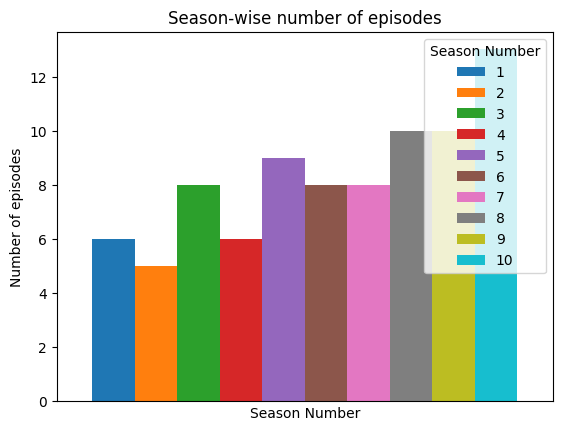

In [14]:
# Season-wise number of episodes
tmp = pd.pivot_table(dragons_den, values='Episode Number', columns='Season Number', aggfunc='max')
print(tmp)
tmp.plot(kind='bar', use_index=False, width=3.0)
plt.xlabel("Season Number")
plt.ylabel("Number of episodes")
plt.title("Season-wise number of episodes")
plt.xticks([])

In [15]:
# Season-wise number of pitches
tmp = dragons_den['Season Number'].value_counts().sort_values()
fig = px.bar(tmp, x=tmp.values, title="<b> Dragons' Den UK - Season-wise number of pitches</b>", template='plotly_white', text=tmp, width=490, height=640)
fig.update_yaxes(tickvals=list(range(16)))
fig.update_xaxes(visible=False)
fig.show()

In [16]:
# There were 1 or 2 pitches, in a each episode
print(dragons_den[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[1 2]


In [17]:
# Types of industries, came for investments, in all seasons
tmp = dragons_den['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b> Dragons' Den British - Industry wise startups</b>", template='simple_white', text=tmp, width=850, height=700)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

In [18]:
# # Types of industries, came for investment, in current/latest season (15th season)
# tmp = dragons_den_recent['Industry'].value_counts().sort_values(ascending=True)
# fig = px.bar(tmp, x=tmp.values, title="<b> UK Dragons' Den in current/latest season (15th season) - Industry wise startups</b>", template='simple_white', text=tmp, width=820, height=650)
# fig.update_yaxes(title_text="")
# fig.update_xaxes(visible=False)
# fig.show()

In [19]:
# # Gender wise
# print(dragons_den['Pitchers Gender'].value_counts(),"\n")

# # In percentage
# print(round(dragons_den['Pitchers Gender'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

# plt.title("Pitchers Gender wise percentage")
# dragons_den["Pitchers Gender"].value_counts().plot(kind='pie', autopct='%.0f%%', colors=["lightblue", "pink", "gray"], shadow=True, fontsize=14)
# plt.ylabel('')

In [20]:
# # Age wise
# print(dragons_den['Pitchers Average Age'].value_counts(),"\n")

# # In percentage
# print(round(dragons_den['Pitchers Average Age'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

# plt.title("Pitchers Age wise percentage")
# dragons_den["Pitchers Average Age"].value_counts().plot(kind='pie', autopct='%.0f%%', cmap='tab20c', shadow=True, fontsize=14)
# plt.ylabel('')

Got Deal
0    69
1    60
Name: count, dtype: int64 

Got Deal
0    53%
1    47%
Name: proportion, dtype: object


Text(0, 0.5, '')

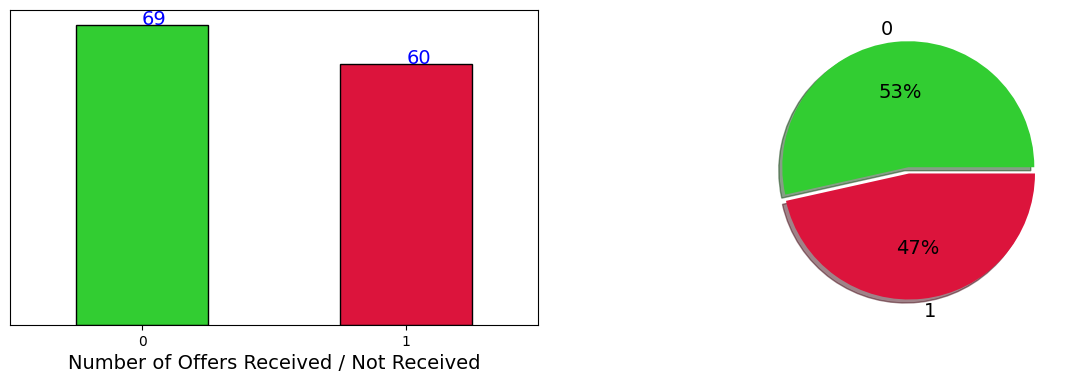

In [21]:
# Offers received
print(dragons_den['Got Deal'].value_counts(), "\n")
print(round(dragons_den['Got Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
dragons_den["Got Deal"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Number of Offers Received / Not Received", size=14)
plt.yticks([])
plt.xticks(rotation=0)
for x,y in enumerate(dragons_den["Got Deal"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="blue")

ax2 = plt.subplot(222)
dragons_den["Got Deal"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=14)
plt.ylabel('')

# 808 companies received offers & 529 startups could not convince #Dragons to invest.

In [22]:
# # Gender wise distribution, who received the offer
# print(dragons_den[dragons_den['Got Deal']==1]['Pitchers Gender'].value_counts())
# plt.title("Gender wise distribution, who received the offer")
# dragons_den[dragons_den['Got Deal']==1]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%',colors=["blue", "yellow", "orange"], fontsize=14)
# plt.ylabel('')

In [23]:
# # Gender wise distribution, who could NOT receive the offer
# print(dragons_den[dragons_den['Got Deal']==0]['Pitchers Gender'].value_counts())
# plt.title("Gender wise distribution, who could NOT receive the offer")
# dragons_den[dragons_den['Got Deal']==0]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%', fontsize=14)
# plt.ylabel('')

In [24]:
# Maximum amount requested
print("Maximum amount requested, by a pitcher -", format_currency(dragons_den['Original Ask Amount'].max(), 'GBP', locale='en_US').replace(".00", ""))

Maximum amount requested, by a pitcher - £250,000


In [25]:
# Least amount requested
print("Least amount requested, by a pitcher -", format_currency(dragons_den['Original Ask Amount'].min(), 'GBP', locale='en_US').replace(".00", ""))

Least amount requested, by a pitcher - £35,000


In [26]:
# Sum of investment amount asked, in Dragons' Den UK
print("Sum of investment amount asked, by all startup companies, in UK Dragons' Den -", format_currency(dragons_den['Original Ask Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))

Sum of investment amount asked, by all startup companies, in UK Dragons' Den - £12,250,500


In [27]:
# Amount invested by all Dragons, in UK Dragons' Den
print("Amount invested by all Dragons, in Dragons' Den UK -", format_currency(dragons_den['Total Deal Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))

Amount invested by all Dragons, in Dragons' Den UK - £5,634,000


In [28]:
# Sum of loan/debt amount, in American Dragons' Den
print("Sum of loan/debt amount, given by all Dragons, in American Dragons' Den -", format_currency(dragons_den['Loan'].sum(), 'GBP', locale='en_US').replace(".00", ""))

Sum of loan/debt amount, given by all Dragons, in American Dragons' Den - £0


In [29]:
# Top 15 investments, as per total investment/deal amount
print(dragons_den.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15))

tmpdf = dragons_den.sort_values('Total Deal Amount', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount', color="Startup Name", title="Highest investment as per deal amount", text=tmpdf['Total Deal Amount'].map(float).map(str))
fig.show()

Startup Name
Gaming Alerts                   200000.0
ProWaste Management Services    200000.0
The Wand Company                200000.0
Visual Talent Ltd               175000.0
Igloo                           160000.0
The Generating Company          160000.0
ElectroExpo                     150000.0
MixAlbum                        150000.0
Rapstrap                        150000.0
Square Mile                     150000.0
Umbrolly                        150000.0
Steri Spray                     145000.0
iTeddy                          140000.0
Grails Ltd1                     120000.0
Ploughcroft Solar               120000.0
Name: Total Deal Amount, dtype: float64


In [30]:
# Top 20 investments, as per total equity/shares percentage diluted
print(dragons_den.groupby('Startup Name')['Total Deal Equity'].max().nlargest(20))

tmpdf = dragons_den.sort_values('Total Deal Equity', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest investment as per equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()


Startup Name
RKA Records                     79.0
Blindsinabox                    50.0
Caribbean Ready Meals           50.0
Fit Fur Life                    50.0
Rapstrap                        50.0
Le Beanock                      49.0
Sweet-Escott Aviation Ltd       49.0
Love Da Pop                     45.0
youdoodoll                      45.0
Billy + Margot                  40.0
Concentrate Design              40.0
D4M Ltd                         40.0
Goldgenie                       40.0
Grails Ltd1                     40.0
Intern Avenue                   40.0
JPM Eco Logistics               40.0
Magic Whiteboard                40.0
MixAlbum                        40.0
Motor Mouse                     40.0
ProWaste Management Services    40.0
Name: Total Deal Equity, dtype: float64


In [31]:
# # Startups who sold 1/3rd of their company (equity) to Dragons
# print(dragons_den.loc[dragons_den['Total Deal Equity'] == 33.3][["Startup Name"]].count())
# print(dragons_den.loc[dragons_den['Total Deal Equity'] == 33.3][["Season Number","Startup Name", "Total Deal Equity"]])

# tmpdf = dragons_den.loc[dragons_den['Total Deal Equity'] == 33.3]
# fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Startups who sold 1/3rd of their company", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
# fig.show()

In [32]:
# # Startups who got Debt/loan amount
# print("Number of startups who got debt/loan amount", dragons_den['Loan'].count(),"\n")

# dragons_den.loc[dragons_den['Loan'] >= 1][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity","Loan"]]

In [33]:
# # Startups who gave Royalty
# print("Number of startups who gave Royalty", dragons_den['Royalty Deal'].count(),"\n")

# dragons_den.loc[dragons_den['Royalty Deal'] == 1][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]]

In [34]:
# # Startups who gave Advisory shares
# print("Number of startups who gave Advisory shares/equity", dragons_den['Advisory Shares Equity'].count(),"\n")

# dragons_den.loc[dragons_den['Advisory Shares Equity'] > 0][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity", "Advisory Shares Equity"]]

In [35]:
# Deals with conditions
print("Number of startups who accepted conditional deals", dragons_den['Deal Has Conditions'].count(),"\n")

dragons_den.loc[dragons_den['Deal Has Conditions'] == 'yes'][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]]

Number of startups who accepted conditional deals 2 



Season Number   Startup Name  Total Deal Amount  Total Deal Equity
115             10  Intern Avenue           100000.0               40.0
117             10      WoodBlocX            75000.0               25.0

In [36]:
# # Gender/age wise pitchers combination
# dragons_den.groupby([dragons_den['Pitchers Gender'], dragons_den['Pitchers Average Age'], dragons_den['Multiple Entrepreneurs']]).size().nlargest(10)

# # Groups/Couples in middle age is most frequent combination followed by Male/Female in middle age

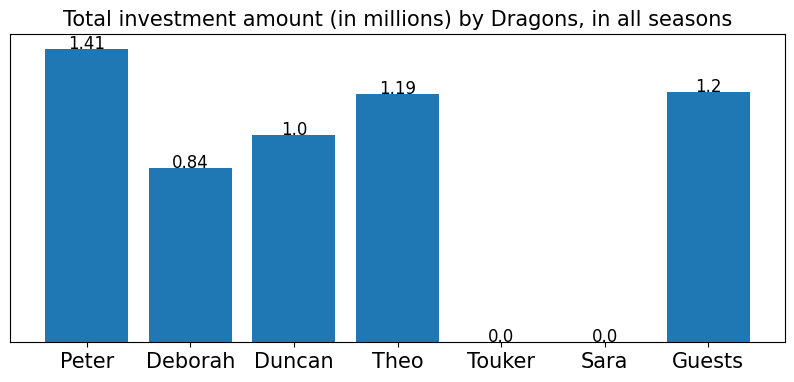

In [37]:
# Amount Invested by Dragons
Amount = [(dragons_den['Peter Jones Investment Amount']/1000000).sum(), (dragons_den['Deborah Meaden Investment Amount']/1000000).sum(), (dragons_den['Duncan Bannatyne Investment Amount']/1000000).sum(), (dragons_den['Theo Paphitis Investment Amount']/1000000).sum(),
    (dragons_den['Touker Suleyman Investment Amount']/1000000).sum(), (dragons_den['Sara Davies Investment Amount']/1000000).sum(), (dragons_den['Guest Investment Amount']/1000000).sum()]
name=['Peter','Deborah','Duncan','Theo','Touker','Sara','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total investment amount (in millions) by Dragons, in all seasons", fontsize=15)
plt.show()

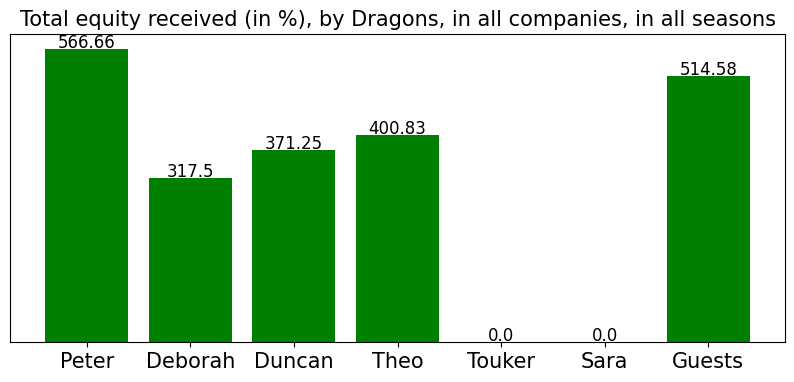

In [38]:
# Equity received by Dragons, in all seasons
Equity = [dragons_den['Peter Jones Investment Equity'].sum(), dragons_den['Deborah Meaden Investment Equity'].sum(), dragons_den['Duncan Bannatyne Investment Equity'].sum(), dragons_den['Theo Paphitis Investment Equity'].sum(),
    dragons_den['Touker Suleyman Investment Equity'].sum(), dragons_den['Sara Davies Investment Equity'].sum(), dragons_den['Guest Investment Equity'].sum()]
name=['Peter','Deborah','Duncan','Theo','Touker','Sara','Guests']
df = {'Name':name, 'Total Equity':Equity}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'], color='g')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total equity received (in %), by Dragons, in all companies, in all seasons", fontsize=15)
plt.show()

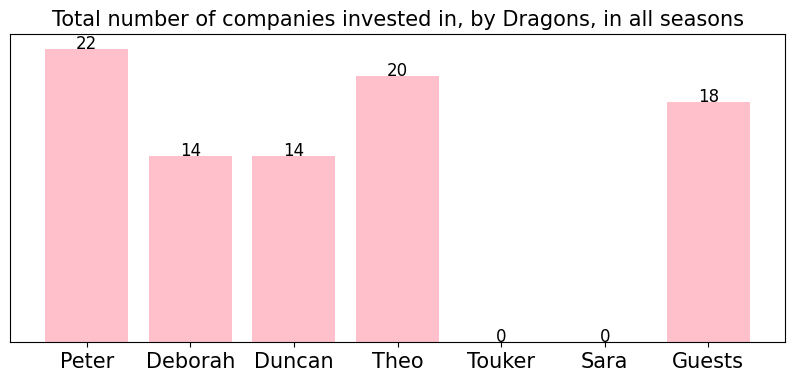

In [39]:
# Number of companies invested
Amount = [(dragons_den['Peter Jones Investment Amount']).count(), (dragons_den['Deborah Meaden Investment Amount']).count(), (dragons_den['Duncan Bannatyne Investment Amount']).count(), (dragons_den['Theo Paphitis Investment Amount']).count(),
    (dragons_den['Touker Suleyman Investment Amount']).count(), (dragons_den['Sara Davies Investment Amount']).count(), (dragons_den['Guest Investment Amount']).count()]
name=['Peter','Deborah','Duncan','Theo','Touker','Sara','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'], color='pink')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total number of companies invested in, by Dragons, in all seasons", fontsize=15)
plt.show()

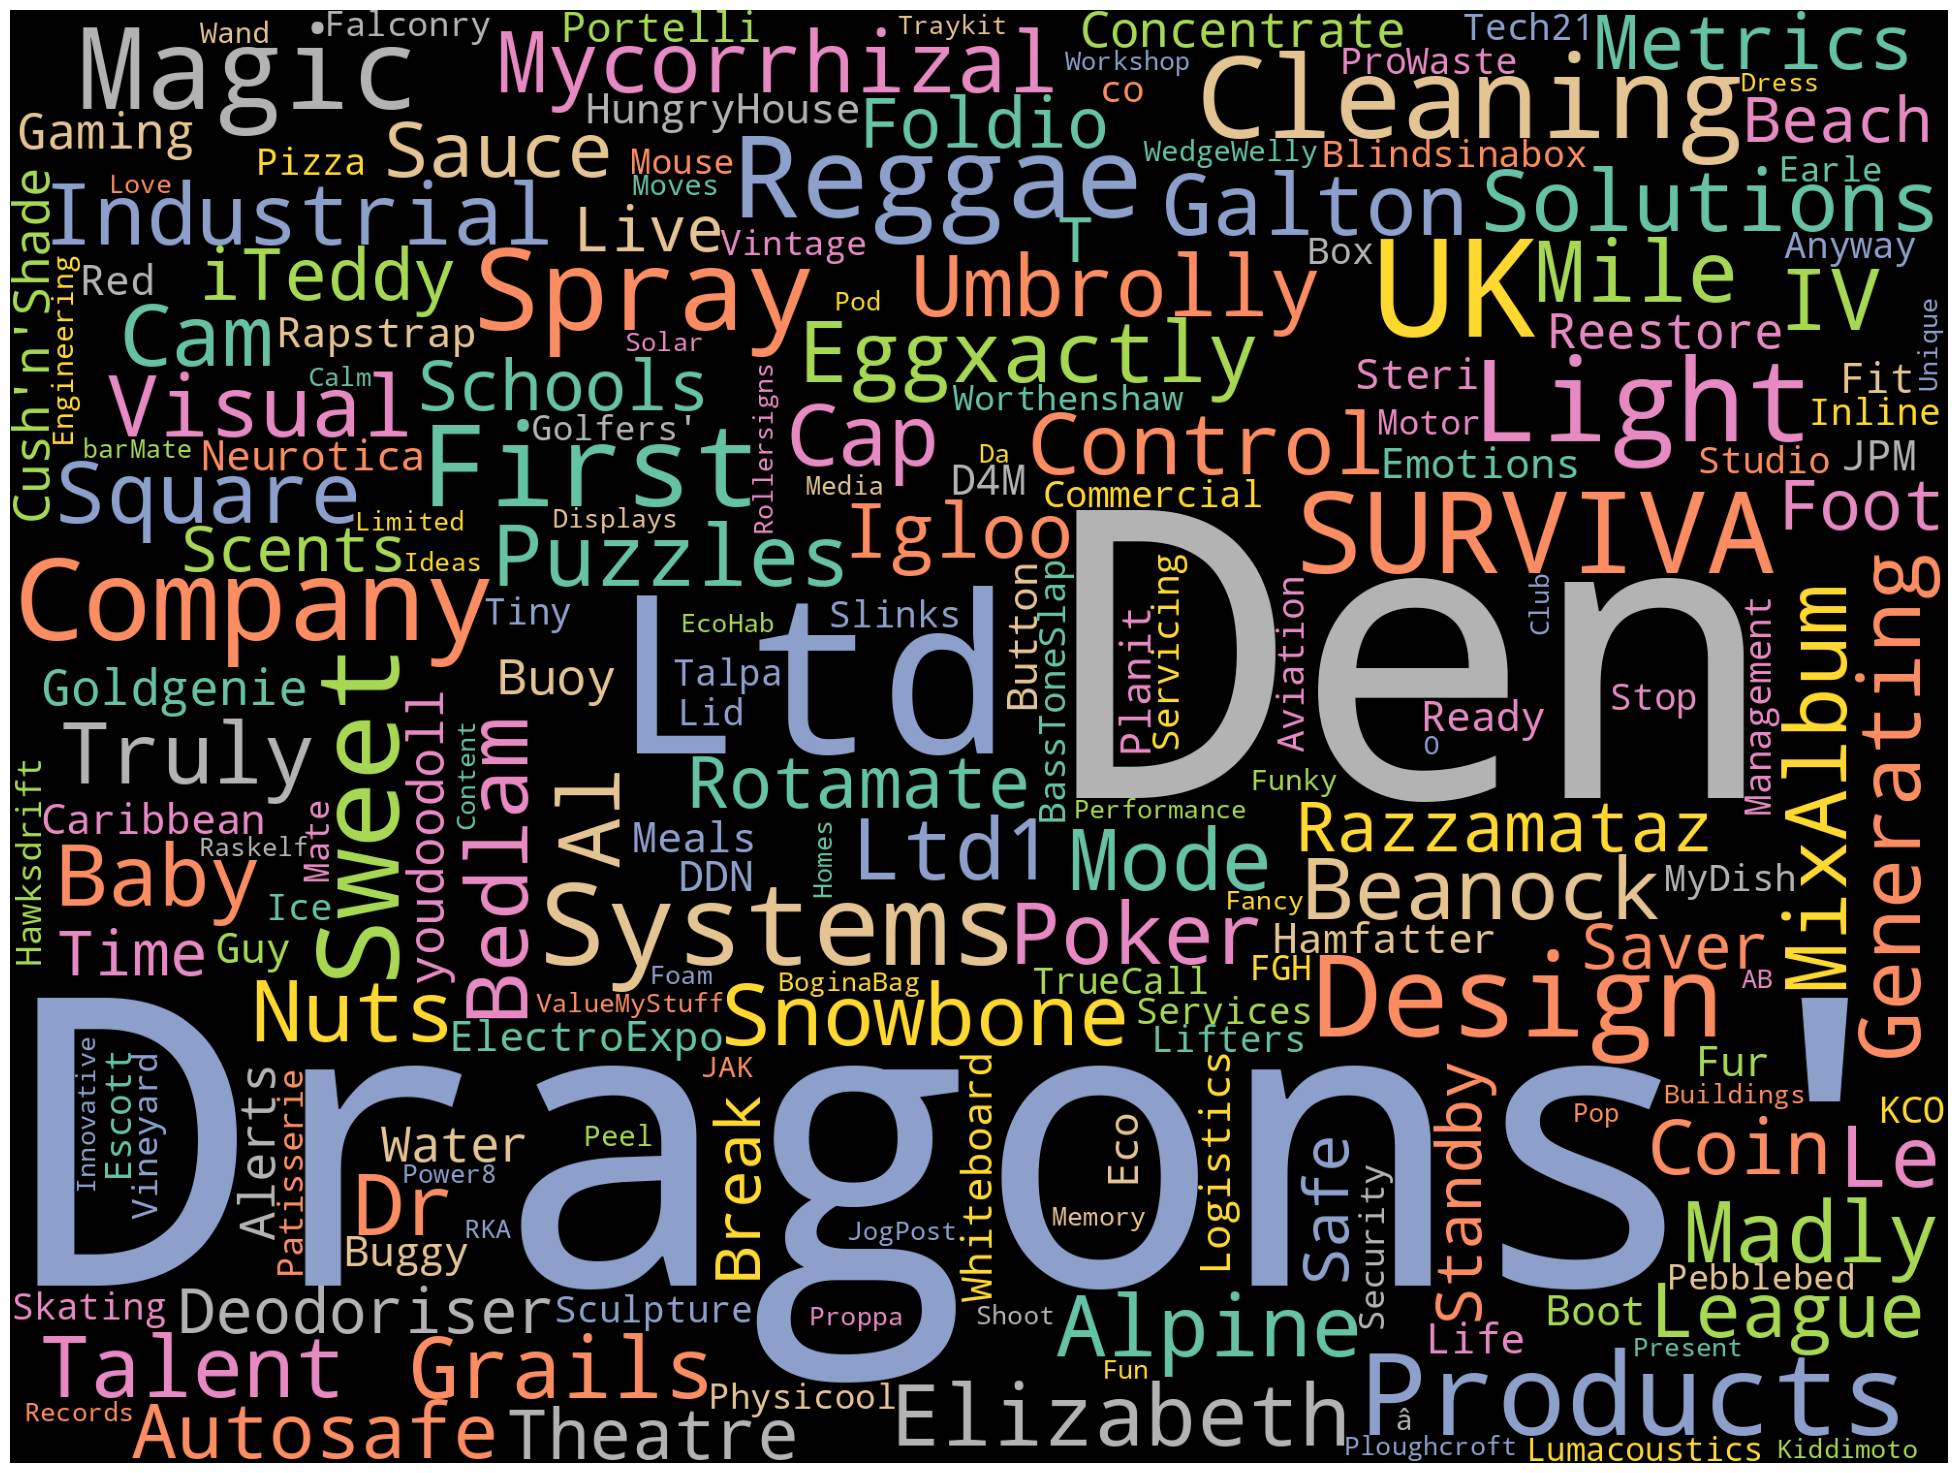

In [40]:
# Word cloud based on Startup Names, in all seasons
text = " Dragons' Den ".join(cat for cat in dragons_den['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2024).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [41]:
# # Word cloud based on Startup Names, in current/latest season (15th season)
# text = " Dragons' Den ".join(cat for cat in dragons_den_recent['Startup Name'])
# stop_words = list(STOPWORDS)
# wordcloud = WordCloud(width=1600, height=1200, stopwords=stop_words, background_color='black', colormap='Set3', collocations=False, random_state=2024).generate(text)
# plt.figure(figsize=(18,15))
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()

Total investments by Peter Jones  22
Investment amount by Peter Jones £1,409,166.67
Equity received by Peter Jones 566.66 % in different companies

Company details:
------------------------------------------------------------------------------------------
                 Startup Name           Industry  Peter Jones Investment Amount
                     Umbrolly                nan                    75000.00000
            Visual Talent Ltd     Fashion/Beauty                   175000.00000
                  Square Mile     Lifestyle/Home                    75000.00000
       The Generating Company                nan                    80000.00000
          Reggae Reggae Sauce  Food and Beverage                    25000.00000
                       iTeddy  Business Services                    70000.00000
               Scents of Time     Fashion/Beauty                    40000.00000
           Concentrate Design Children/Education                   100000.00000
                    Hamf

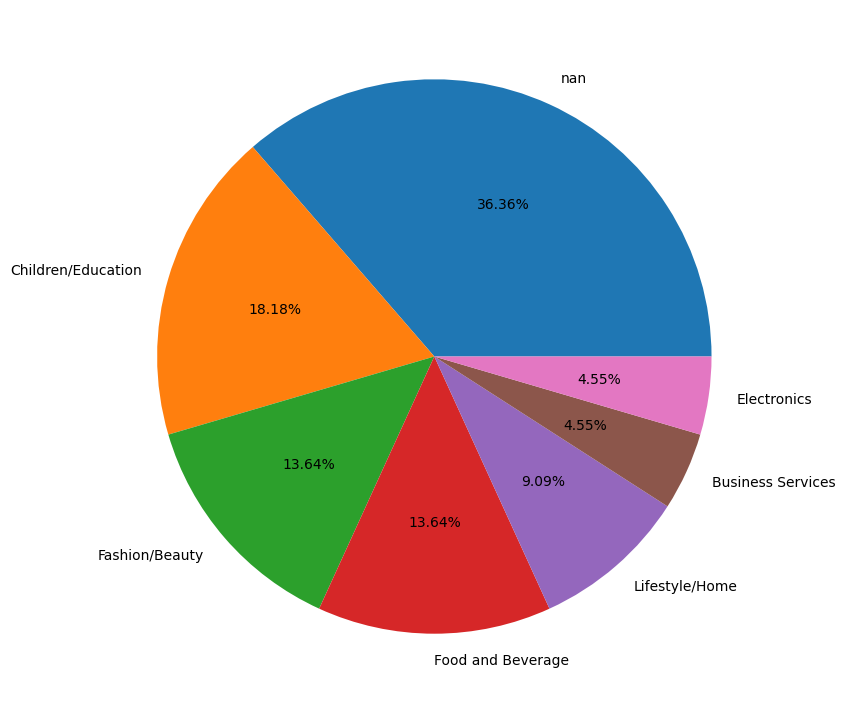

In [42]:
print("Total investments by Peter Jones", dragons_den[dragons_den['Peter Jones Investment Amount']>0][['Peter Jones Investment Amount']].count().to_string()[-3:])
print("Investment amount by Peter Jones", format_currency(dragons_den['Peter Jones Investment Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))
print("Equity received by Peter Jones", round(dragons_den['Peter Jones Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Peter Jones Investment Amount']>0][["Startup Name","Industry","Peter Jones Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nPeter Jones industry wise investments\n")
print(dragons_den[dragons_den['Peter Jones Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Peter Jones Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Peter Jones Investment Amount']>0] [["Startup Name","Peter Jones Investment Amount","Peter Jones Investment Equity"]].sort_values(by="Peter Jones Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Peter Jones Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

Total investments by Deborah Meaden  14
Investment amount by Deborah Meaden £837,500
Equity received by Deborah Meaden 317.5 % in different companies

Company details:
------------------------------------------------------------------------------------------
                Startup Name           Industry  Deborah Meaden Investment Amount
                    MixAlbum      Software/Tech                           75000.0
                  youdoodoll                nan                           35000.0
                    Reestore    Green/CleanTech                           25000.0
                 Steri Spray                nan                           72500.0
           JPM Eco Logistics                nan                           50000.0
                  Buggy Boot  Business Services                           80000.0
            Magic Whiteboard Children/Education                           50000.0
ProWaste Management Services    Green/CleanTech                          100000.0
   

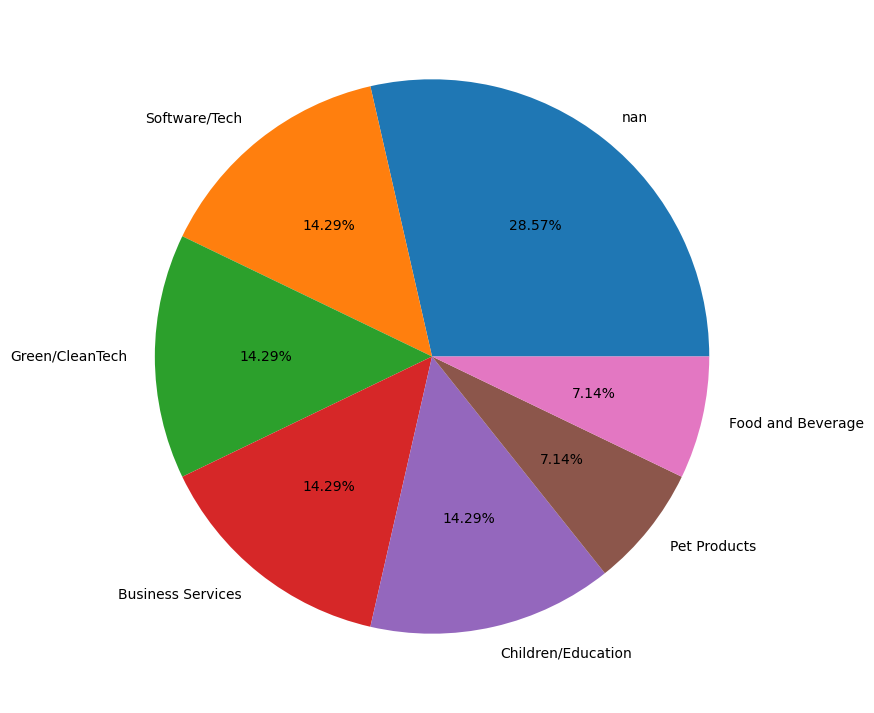

In [43]:
print("Total investments by Deborah Meaden", dragons_den[dragons_den['Deborah Meaden Investment Amount']>0][['Deborah Meaden Investment Amount']].count().to_string()[-3:])
print("Investment amount by Deborah Meaden", format_currency(dragons_den['Deborah Meaden Investment Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))
print("Equity received by Deborah Meaden", round(dragons_den['Deborah Meaden Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Deborah Meaden Investment Amount']>0][["Startup Name","Industry","Deborah Meaden Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nDeborah Meaden industry wise investments\n")
print(dragons_den[dragons_den['Deborah Meaden Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Deborah Meaden Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Deborah Meaden Investment Amount']>0] [["Startup Name","Deborah Meaden Investment Amount","Deborah Meaden Investment Equity"]].sort_values(by="Deborah Meaden Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Deborah Meaden Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

Total investments by Duncan Bannatyne  14
Investment amount by Duncan Bannatyne £995,000
Equity received by Duncan Bannatyne 371.25 % in different companies

Company details:
------------------------------------------------------------------------------------------
                Startup Name           Industry  Duncan Bannatyne Investment Amount
                    Umbrolly                nan                             75000.0
                       Igloo  Business Services                             80000.0
  Razzamataz Theatre Schools Children/Education                             50000.0
       Caribbean Ready Meals  Food and Beverage                             50000.0
                 ElectroExpo        Electronics                             75000.0
                     D4M Ltd  Business Services                             37500.0
                    Rapstrap    Green/CleanTech                             75000.0
                Blindsinabox     Lifestyle/Home               

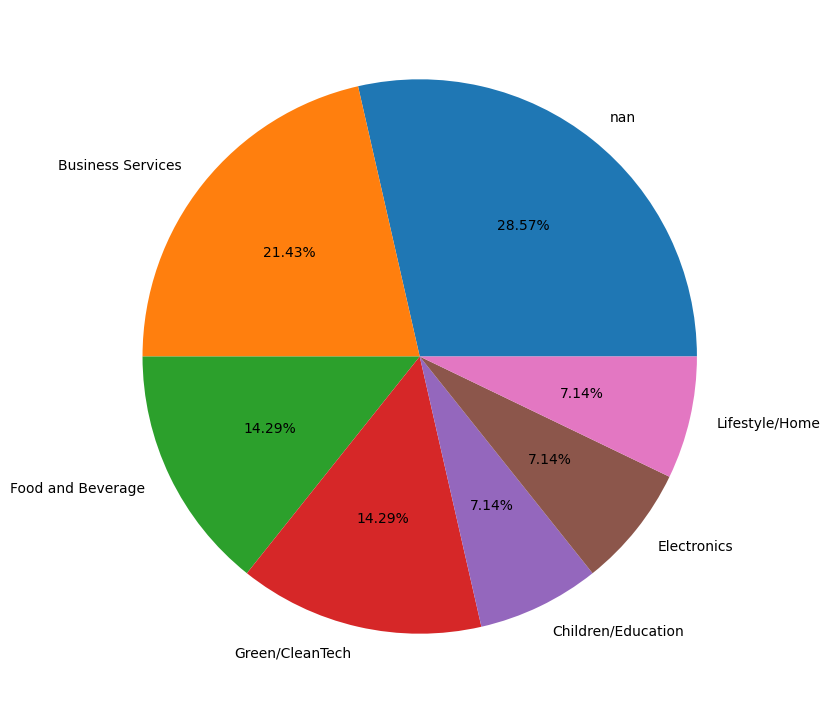

In [44]:
print("Total investments by Duncan Bannatyne", dragons_den[dragons_den['Duncan Bannatyne Investment Amount']>0][['Duncan Bannatyne Investment Amount']].count().to_string()[-3:])
print("Investment amount by Duncan Bannatyne", format_currency(dragons_den['Duncan Bannatyne Investment Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))
print("Equity received by Duncan Bannatyne", round(dragons_den['Duncan Bannatyne Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Duncan Bannatyne Investment Amount']>0][["Startup Name","Industry","Duncan Bannatyne Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nDuncan Bannatyne industry wise investments\n")
print(dragons_den[dragons_den['Duncan Bannatyne Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Duncan Bannatyne Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Duncan Bannatyne Investment Amount']>0] [["Startup Name","Duncan Bannatyne Investment Amount","Duncan Bannatyne Investment Equity"]].sort_values(by="Duncan Bannatyne Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Duncan Bannatyne Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

Total investments by Theo Paphitis  20
Investment amount by Theo Paphitis £1,191,666.67
Equity received by Theo Paphitis 400.83 % in different companies

Company details:
------------------------------------------------------------------------------------------
                 Startup Name           Industry  Theo Paphitis Investment Amount
                  Square Mile     Lifestyle/Home                      75000.00000
       The Generating Company                nan                      80000.00000
                     MixAlbum      Software/Tech                      75000.00000
                       iTeddy  Business Services                      70000.00000
                       Foldio                nan                      80000.00000
               Scents of Time     Fashion/Beauty                      40000.00000
                Gaming Alerts      Software/Tech                     200000.00000
                     Reestore    Green/CleanTech                      25000.00000


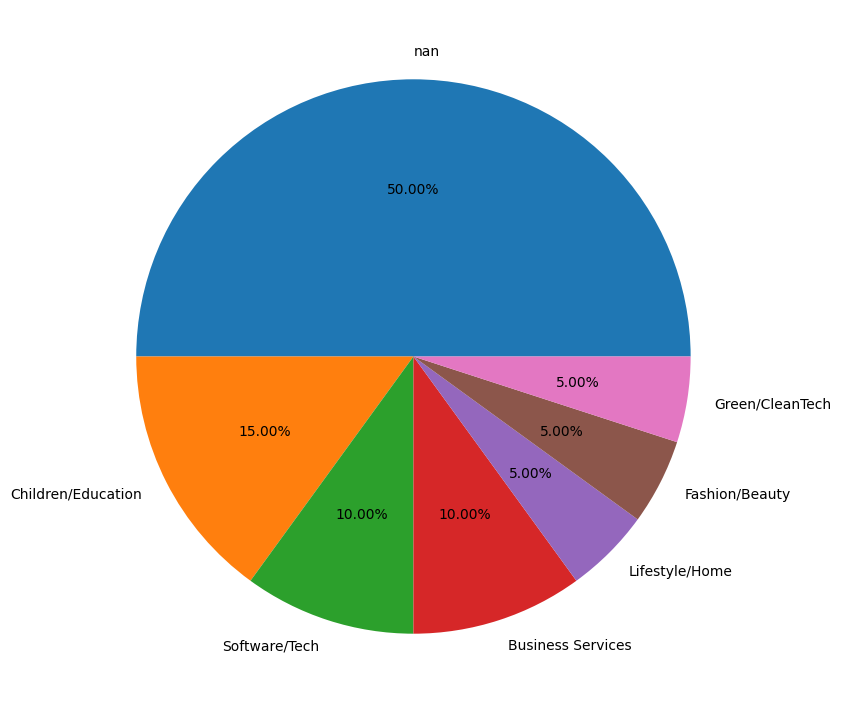

In [45]:
print("Total investments by Theo Paphitis", dragons_den[dragons_den['Theo Paphitis Investment Amount']>0][['Theo Paphitis Investment Amount']].count().to_string()[-3:])
print("Investment amount by Theo Paphitis", format_currency(dragons_den['Theo Paphitis Investment Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))
print("Equity received by Theo Paphitis", round(dragons_den['Theo Paphitis Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Theo Paphitis Investment Amount']>0][["Startup Name","Industry","Theo Paphitis Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nTheo Paphitis industry wise investments\n")
print(dragons_den[dragons_den['Theo Paphitis Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Theo Paphitis Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Theo Paphitis Investment Amount']>0] [["Startup Name","Theo Paphitis Investment Amount","Theo Paphitis Investment Equity"]].sort_values(by="Theo Paphitis Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Theo Paphitis Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

Total investments by Touker Suleyman   0
Investment amount by Touker Suleyman £0
Equity received by Touker Suleyman 0.0 % in different companies

Company details:
------------------------------------------------------------------------------------------
Empty DataFrame
Columns: [Startup Name, Industry, Touker Suleyman Investment Amount]
Index: []
------------------------------------------------------------------------------------------

Touker Suleyman industry wise investments

Series([], Name: count, dtype: int64)


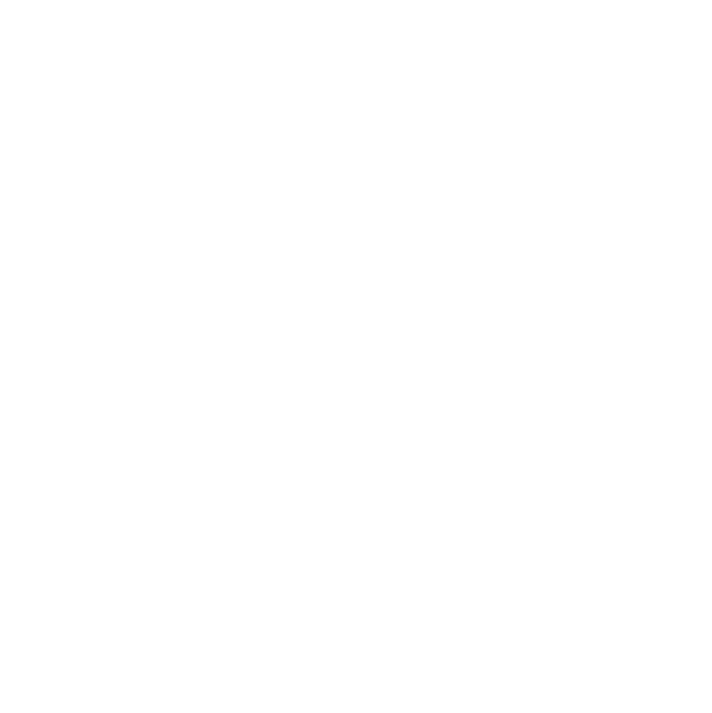

In [46]:
print("Total investments by Touker Suleyman", dragons_den[dragons_den['Touker Suleyman Investment Amount']>0][['Touker Suleyman Investment Amount']].count().to_string()[-3:])
print("Investment amount by Touker Suleyman", format_currency(dragons_den['Touker Suleyman Investment Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))
print("Equity received by Touker Suleyman", round(dragons_den['Touker Suleyman Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Touker Suleyman Investment Amount']>0][["Startup Name","Industry","Touker Suleyman Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nTouker Suleyman industry wise investments\n")
print(dragons_den[dragons_den['Touker Suleyman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Touker Suleyman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Touker Suleyman Investment Amount']>0] [["Startup Name","Touker Suleyman Investment Amount","Touker Suleyman Investment Equity"]].sort_values(by="Touker Suleyman Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Touker Suleyman Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

Total investments by Sara Davies   0
Investment amount by Sara Davies £0
Equity received by Sara Davies 0.0 % in different companies

Company details:
------------------------------------------------------------------------------------------
Empty DataFrame
Columns: [Startup Name, Industry, Sara Davies Investment Amount]
Index: []
------------------------------------------------------------------------------------------

Sara Davies industry wise investments

Series([], Name: count, dtype: int64)


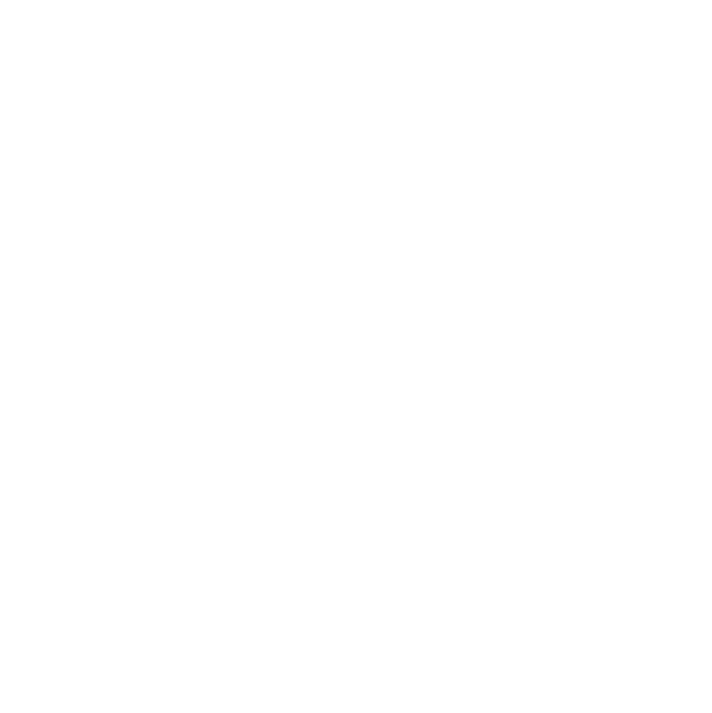

In [47]:
print("Total investments by Sara Davies", dragons_den[dragons_den['Sara Davies Investment Amount']>0][['Sara Davies Investment Amount']].count().to_string()[-3:])
print("Investment amount by Sara Davies", format_currency(dragons_den['Sara Davies Investment Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))
print("Equity received by Sara Davies", round(dragons_den['Sara Davies Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Sara Davies Investment Amount']>0][["Startup Name","Industry","Sara Davies Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nSara Davies industry wise investments\n")
print(dragons_den[dragons_den['Sara Davies Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Sara Davies Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Sara Davies Investment Amount']>0] [["Startup Name","Sara Davies Investment Amount","Sara Davies Investment Equity"]].sort_values(by="Sara Davies Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Sara Davies Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

Total investments by all Guests 18
Investment amount by all Guests £1,200,666.67
Equity received by all Guests 514.58 % in different companies

Company details:
--------------------------------------------------------------------------------------------
                 Startup Name           Industry  Guest Investment Amount                   Guest Name
                  Grails Ltd1     Fashion/Beauty             120000.00000 Doug Richard, Rachel Elnaugh
                   Le Beanock                nan              54000.00000               Rachel Elnaugh
        First Light Solutions                nan             100000.00000             Richard Farleigh
          Reggae Reggae Sauce  Food and Beverage              25000.00000             Richard Farleigh
                        Igloo  Business Services              80000.00000             Richard Farleigh
                    Goldgenie     Lifestyle/Home              60000.00000                   James Caan
        Caribbean Ready M

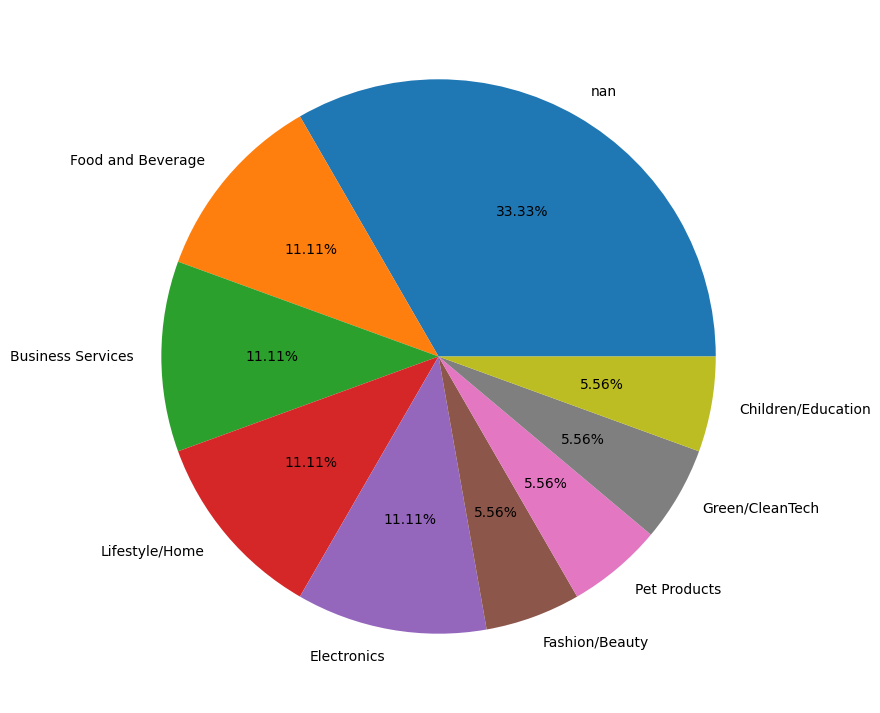

In [48]:
print("Total investments by all Guests", dragons_den[dragons_den['Guest Investment Amount']>0][['Guest Investment Amount']].count().to_string()[-2:])
print("Investment amount by all Guests", format_currency(dragons_den['Guest Investment Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))
print("Equity received by all Guests", round(dragons_den['Guest Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*92)
print(dragons_den.loc[dragons_den['Guest Investment Amount']>0][["Startup Name","Industry","Guest Investment Amount","Guest Name"]].to_string(index=False))
print('-'*92)

print("\nAll Guests industry wise investments\n")
print(dragons_den[dragons_den['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Guest Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

In [49]:
# Top 10, guest Dragons who invested in most number of companies
dragons_den.loc[dragons_den['Guest Investment Amount'] > 1].groupby('Guest Name').size().nlargest(10)

Guest Name
James Caan                      11
Richard Farleigh                 3
Hilary Devey                     2
Doug Richard, Rachel Elnaugh     1
Rachel Elnaugh                   1
dtype: int64

In [50]:
# Investment amount by guests, in Millions
round(dragons_den.groupby(["Guest Name"])["Guest Investment Amount"].sum().sort_values(ascending=False)/1000000,2)

Guest Name
James Caan                      0.70
Richard Farleigh                0.20
Doug Richard, Rachel Elnaugh    0.12
Hilary Devey                    0.12
Rachel Elnaugh                  0.05
Name: Guest Investment Amount, dtype: float64

Number of Dragons in Deal
1.0    32
2.0    27
3.0     1
Name: count, dtype: int64 

Number of Dragons in Deal
1.0    53%
2.0    45%
3.0     2%
Name: proportion, dtype: object


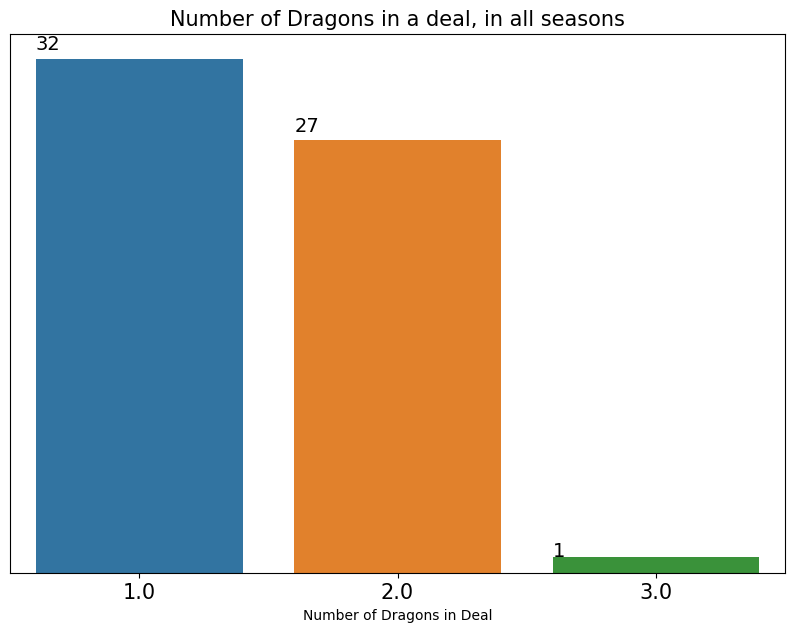

In [51]:
# Number of Dragons in a deal, in all seasons
print(dragons_den['Number of Dragons in Deal'].value_counts(), "\n")

# In percentage
print(round(dragons_den['Number of Dragons in Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(10, 7))
plt.title("Number of Dragons in a deal, in all seasons", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax = sns.countplot(data = dragons_den, x = 'Number of Dragons in Deal')
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [52]:
# All Dragons deals
print(dragons_den.loc[dragons_den['Number of Dragons in Deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

Empty DataFrame
Columns: [Season Number, Startup Name, Total Deal Amount, Total Deal Equity]
Index: []


In [53]:
# Dragons with most number of solo deals
amt_cols = dragons_den.columns[dragons_den.columns.str.contains(' Investment Amount')].tolist()
tmp = dragons_den.loc[dragons_den['Number of Dragons in Deal'] == 1][amt_cols]
tmp.count().sort_values(ascending=False).nlargest(3)

# Peter Jones did most number of solo deals, than any other Dragon

Peter Jones Investment Amount       10
Guest Investment Amount              8
Deborah Meaden Investment Amount     5
dtype: int64

In [54]:
# Dragons with most number of episode presence, in all seasons
present_cols = dragons_den.columns[dragons_den.columns.str.endswith(' Present')].tolist()
tmp = dragons_den[present_cols]
tmp.sum().sort_values(ascending=False).nlargest(3)

# Peter Jones was there in most number of episodes

Peter Jones Present      22.0
Theo Paphitis Present    20.0
Guest Present            18.0
dtype: float64

In [55]:
# # Top 25 UK states of pitcher's
# tmp = dragons_den['Pitchers State'].value_counts().nlargest(20).sort_values(ascending=True)
# fig = px.bar(tmp, x=tmp.values, title="<b>Top 20 States</b> from where pitchers came from", template='simple_white', text=tmp, width=850, height=750)
# fig.update_yaxes(title_text="")
# fig.update_xaxes(visible=False)
# fig.show()

In [56]:
# # Top 20 UK cities
# tmp = dragons_den['Pitchers City'].value_counts().nlargest(20).sort_values(ascending=True)
# fig = px.bar(tmp, x=tmp.values, title="<b>Top 20 British cities</b> with number of startups came for pitching", template='simple_white', text=tmp, width=850, height=800)
# fig.update_yaxes(title_text="")
# fig.update_xaxes(visible=False)
# fig.show()

In [57]:
# Most frequently asked amount, by startups
dragons_den.groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (GBP) and Number times asked

Original Ask Amount
100000    27
50000     23
75000     14
80000     11
150000     9
60000      7
200000     7
70000      4
120000     4
40000      2
dtype: int64

In [58]:
# Most frequently offered equity, by startups
dragons_den.groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number times offered

Original Offered Equity
40.0    39
30.0    26
25.0    15
50.0    13
35.0     6
45.0     6
20.0     5
26.0     3
49.0     3
22.5     2
dtype: int64

In [59]:
# ✅ Most frequently invested amount, by Dragons
dragons_den.groupby('Total Deal Amount').size().nlargest(10)

# Dragons mostly invested more than 100K per deal

# Total Deal Amount (GBP) and Number times invested

Total Deal Amount
100000.0    11
50000.0      9
80000.0      8
60000.0      5
75000.0      5
150000.0     5
200000.0     3
65000.0      2
70000.0      2
120000.0     2
dtype: int64

In [60]:
# ✅ Most frequently received total equity, by Dragons
dragons_den.groupby('Total Deal Equity').size().nlargest(10)

# Dragons are expecting more than 20% equity, in a deal

# Total Deal Equity (in %) and Number times invested

Total Deal Equity
40.0    21
30.0    13
25.0     6
35.0     5
50.0     4
45.0     2
49.0     2
15.0     1
20.0     1
22.5     1
dtype: int64

In [61]:
# Most frequently asked amount, deals received % and not received %
tmp2 = pd.crosstab(dragons_den['Original Ask Amount'], dragons_den['Got Deal']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=False)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

# Most frequest Deal Amount (in GBP) and % of deal received and not received

deal_percentage  no_deal_percentage
100000             41.0                59.0
50000              39.0                61.0
80000              64.0                36.0
150000             56.0                44.0
75000              29.0                71.0
60000              57.0                43.0
200000             43.0                57.0
70000              75.0                25.0
120000             50.0                50.0
160000            100.0                 0.0

In [62]:
# Most frequently asked amount, deals received % and not received %
tmp2 = pd.crosstab(dragons_den['Original Offered Equity'], dragons_den['Got Deal']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=False)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

# Most frequest Offered Equity (in %) and % of deal received and not received

deal_percentage  no_deal_percentage
40.0             54.0                46.0
30.0             50.0                50.0
25.0             40.0                60.0
35.0             83.0                17.0
50.0             31.0                69.0
49.0             67.0                33.0
45.0             33.0                67.0
15.0            100.0                 0.0
20.0             20.0                80.0
22.5             50.0                50.0

In [63]:
# Mostly successful combinations (of asked amount and offered equity)
dragons_den.loc[dragons_den['Got Deal'] == 1].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)

# If you are pitching in UK Dragons' Den, ask for 50K-150K with 30-40% equity ✅

Original Ask Amount  Original Offered Equity
100000               40.0                       6
50000                25.0                       3
                     30.0                       3
150000               40.0                       3
60000                30.0                       2
                     40.0                       2
65000                30.0                       2
80000                30.0                       2
100000               50.0                       2
200000               30.0                       2
dtype: int64

In [64]:
# Most frequently asked amount, by startups who could NOT get a deal
dragons_den.loc[dragons_den['Got Deal'] == 0].groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (GBP) and Number times asked (but rejected by Dragons) ❌

Original Ask Amount
100000    16
50000     14
75000     10
80000      4
150000     4
200000     4
60000      3
85000      2
120000     2
250000     2
dtype: int64

In [65]:
# Most frequently offered equity, by startups who could NOT get a deal
dragons_den.loc[dragons_den['Got Deal'] == 0].groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number times offered (but rejected by Dragons) ❌

Original Offered Equity
40.0    18
30.0    13
25.0     9
50.0     9
20.0     4
45.0     4
26.0     2
10.0     1
12.5     1
22.5     1
dtype: int64

In [66]:
# Mostly rejected combinations (of asked amount and offered equity)
dragons_den.loc[dragons_den['Got Deal'] == 0].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)

# If you are pitching in Dragons' Den US, don't ask for 100K with 50% equity or 50K with 20-40% equity 🔴

Original Ask Amount  Original Offered Equity
100000               50.0                       5
50000                40.0                       4
                     20.0                       3
                     30.0                       3
75000                40.0                       3
100000               30.0                       3
60000                40.0                       2
75000                45.0                       2
85000                40.0                       2
100000               40.0                       2
dtype: int64

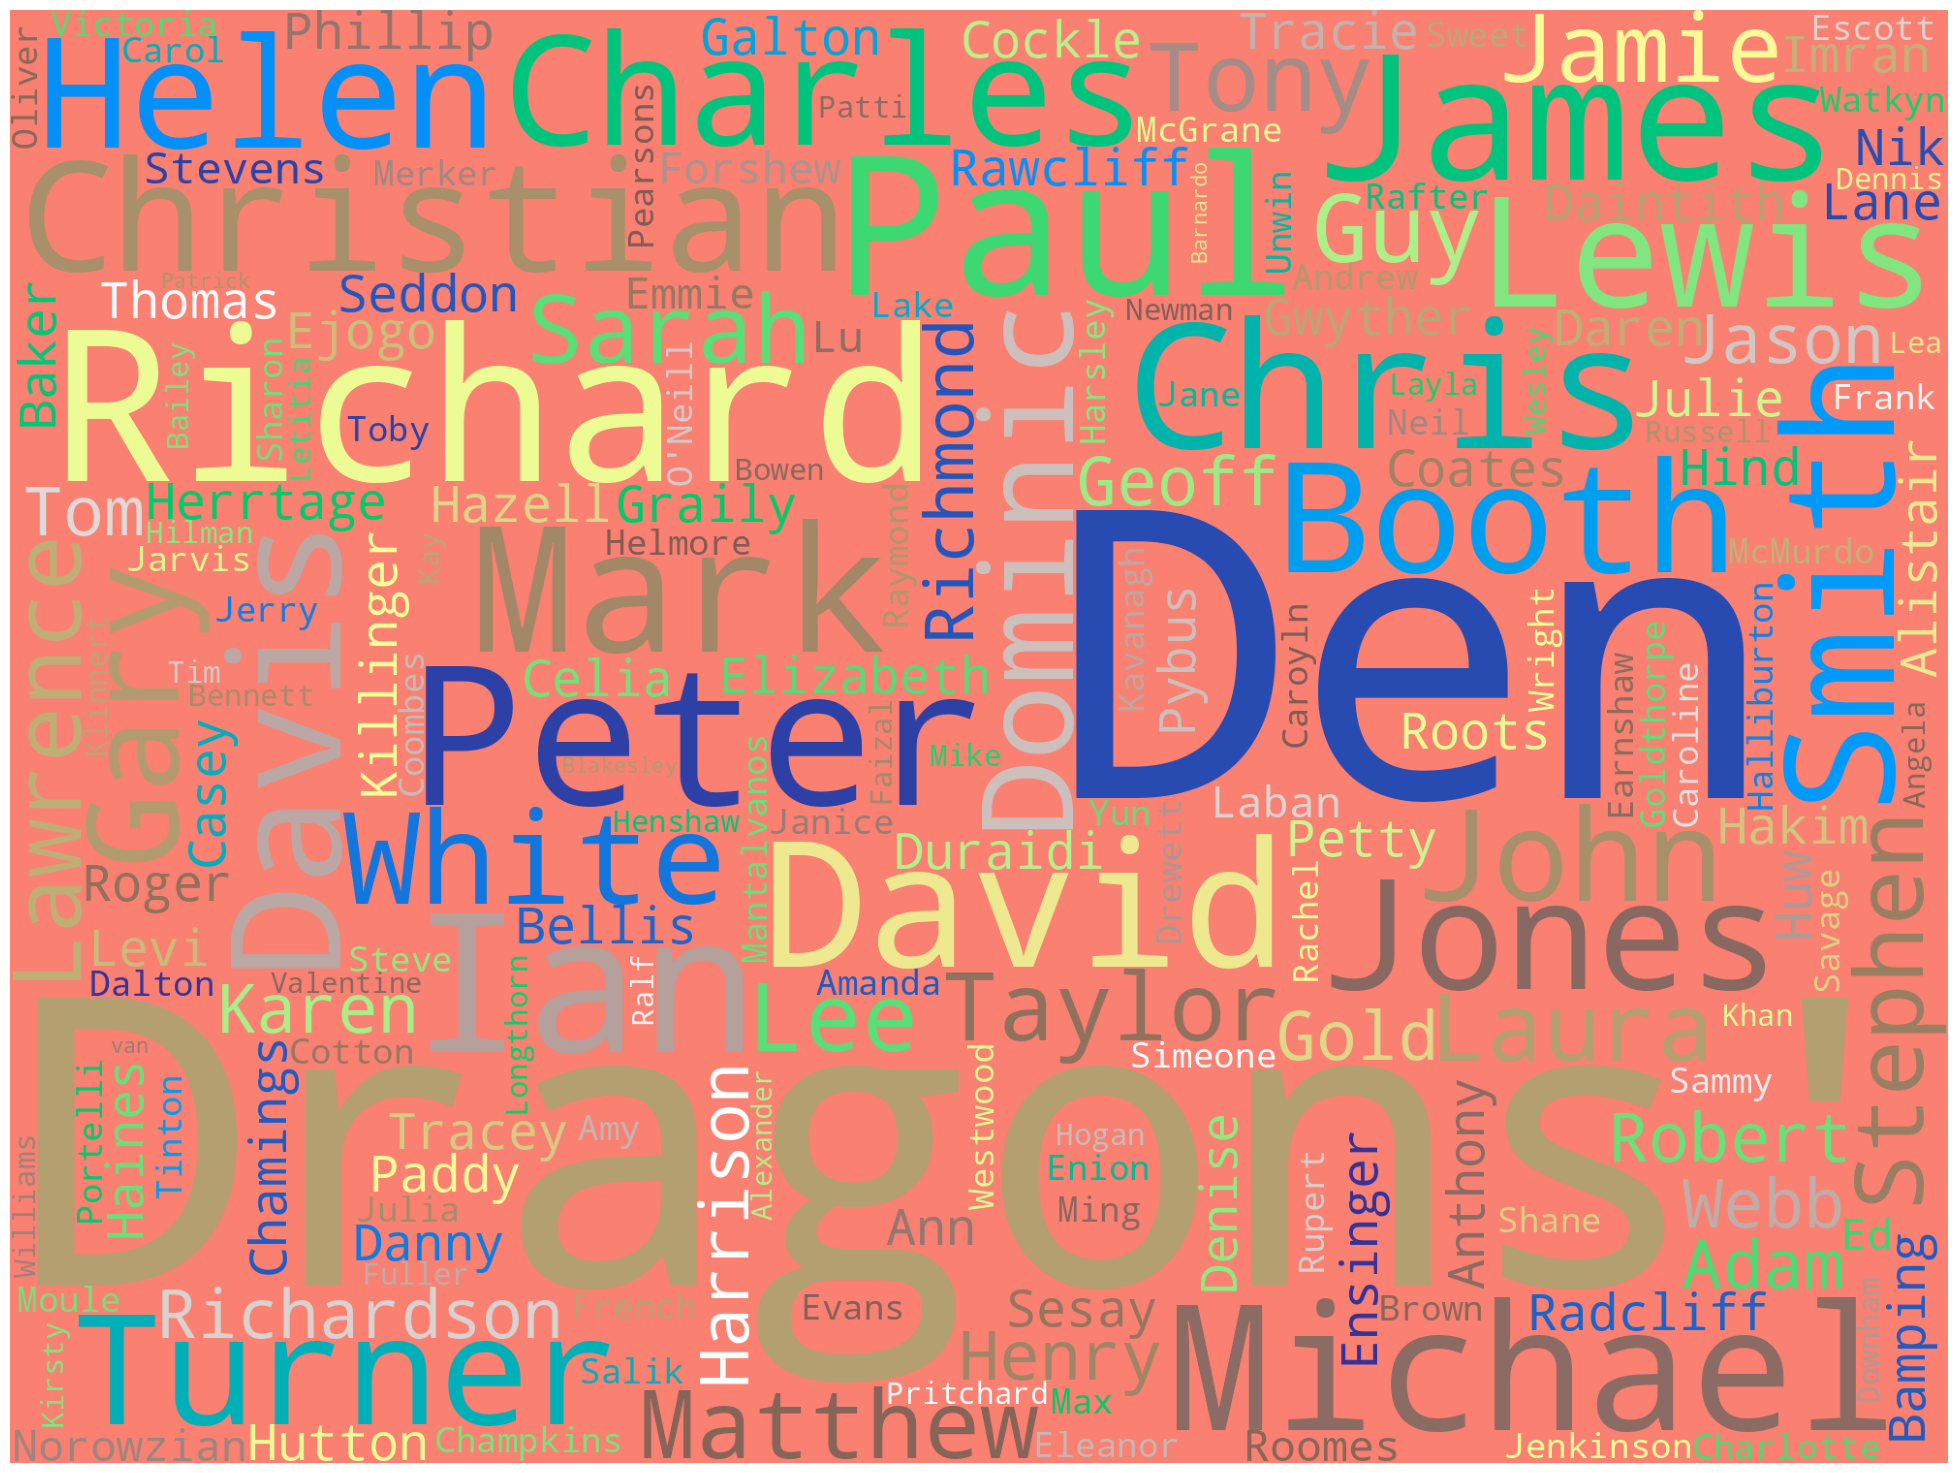

In [67]:
# Word cloud based on Pitcher name
text = " Dragons' Den ".join(cat for cat in dragons_den['Entrepreneur Names'].astype(str))
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='terrain_r', collocations=False, random_state=2024).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [68]:
# Many (3) companies got more amount than they asked/expected
print(dragons_den.loc[dragons_den['Original Ask Amount'] < dragons_den["Total Deal Amount"]][["Startup Name"]].count())
dragons_den.loc[dragons_den['Original Ask Amount'] < dragons_den["Total Deal Amount"]][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount"]]

Startup Name    3
dtype: int64


Season Number                   Startup Name  Original Ask Amount  \
48              6                      Neurotica                56000   
55              6  Guy Portelli Sculpture Studio                70000   
58              6                       Tiny Box                53000   

    Total Deal Amount  
48            75000.0  
55            80000.0  
58            60000.0

In [69]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
dragons_den.loc[dragons_den['Original Offered Equity'] < dragons_den["Total Deal Equity"]][["Season Number","Startup Name","Original Offered Equity","Total Deal Equity"]]

Empty DataFrame
Columns: [Season Number, Startup Name, Original Offered Equity, Total Deal Equity]
Index: []

In [70]:
# Below (57) companies got the same valuation they requested (with or without loan)
print(dragons_den.loc[dragons_den['Valuation Requested'] == dragons_den["Deal Valuation"]][["Startup Name"]].count())
dragons_den.loc[dragons_den['Valuation Requested'] == dragons_den["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    57
dtype: int64


Season Number                  Startup Name  Valuation Requested  \
0                1                      Umbrolly               375000   
1                1                   Grails Ltd1               300000   
2                1                    Le Beanock               110204   
7                1             Visual Talent Ltd               437500   
8                2                   Square Mile               375000   
11               2        The Generating Company               400000   
15               3         First Light Solutions               333333   
16               3                      MixAlbum               375000   
21               4           Reggae Reggae Sauce               125000   
22               4                         Igloo               711111   
23               4                        iTeddy               350000   
25               4    Razzamataz Theatre Schools               200000   
26               4                        Foldio               228571   
29               4                Scents of Time               200000   
32               5                     Goldgenie               150000   
33               5                    youdoodoll                77778   
34               5                 Gaming Alerts               666667   
35               5            Concentrate Design               250000   
36               5                      Reestore               166667   
40               5                   Steri Spray               362500   
41               5         Caribbean Ready Meals               200000   
42               5                  Fit Fur Life               200000   
43               5             JPM Eco Logistics               250000   
44               5                   ElectroExpo               468750   
46               6                     Hamfatter               250000   
47               6                       D4M Ltd               187500   
51               6                    Buggy Boot               266667   
52               6                      Rapstrap               300000   
53               6              Magic Whiteboard               250000   
56               6                   Magic Pizza               166667   
57               6                  Blindsinabox                80000   
59               6  ProWaste Management Services               500000   
60               7     Sweet-Escott Aviation Ltd               163265   
66               7        UK Commercial Cleaning               285714   
68               7                  MyDish.co.uk               666667   
74               7                   Motor Mouse               250000   
76               8                 Worthenshaw's               216667   
80               8           Hawksdrift Falconry               200000   
82               8                    WedgeWelly               216667   
83               8              Peel Engineering               266667   
86               8              The Wand Company               666667   
87               8                  ValueMyStuff               250000   
92               9              The Present Club               200000   
93               9             Ploughcroft Solar               480000   
94               9                   Love Da Pop               155556   
95               9           Raskelf Memory Foam               307692   
99               9                     BoginaBag               166667   
101              9                AB Performance               142857   
104              9                   RKA Records                63291   
110             10                  Shampooheads               375000   
112             10                        YUUbag               200000   
115             10                 Intern Avenue               250000   
116             10                Billy + Margot               150000   
117             10                     WoodBlocX               

In [71]:
# There are 3 companies which got more valuation than they pitched
print(dragons_den.loc[dragons_den['Valuation Requested'] < dragons_den["Deal Valuation"]][["Startup Name"]].count())
dragons_den.loc[dragons_den['Valuation Requested'] < dragons_den["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    3
dtype: int64


Season Number                   Startup Name  Valuation Requested  \
48              6                      Neurotica               160000   
55              6  Guy Portelli Sculpture Studio               280000   
58              6                       Tiny Box               132500   

    Deal Valuation  
48        214286.0  
55        320000.0  
58        150000.0

In [72]:
# # Episodes which got most TRP
# print("Maximum viewership in UK:", dragons_den['UK Viewership'].max(), "\n")
# print(dragons_den.loc[dragons_den['UK Viewership']>=dragons_den['UK Viewership'].max()-0.4][["Season Number","Episode Number","Startup Name","UK Viewership"]].head(18).sort_values("UK Viewership",ascending=False).to_string(index=False))

In [73]:
# # Episodes which got least TRP
# print("Minimum viewership in United Kingdom:", dragons_den['UK Viewership'].min(), "\n")
# print(dragons_den.loc[dragons_den['UK Viewership']<=dragons_den['UK Viewership'].min()+0.3][["Season Number","Episode Number","Startup Name","UK Viewership"]].head(18).sort_values("UK Viewership").to_string(index=False))

Multiple Entrepreneurs
0    80
1    49
Name: count, dtype: Int64 

Multiple Entrepreneurs
0    62%
1    38%
Name: proportion, dtype: object


<Axes: ylabel='count'>

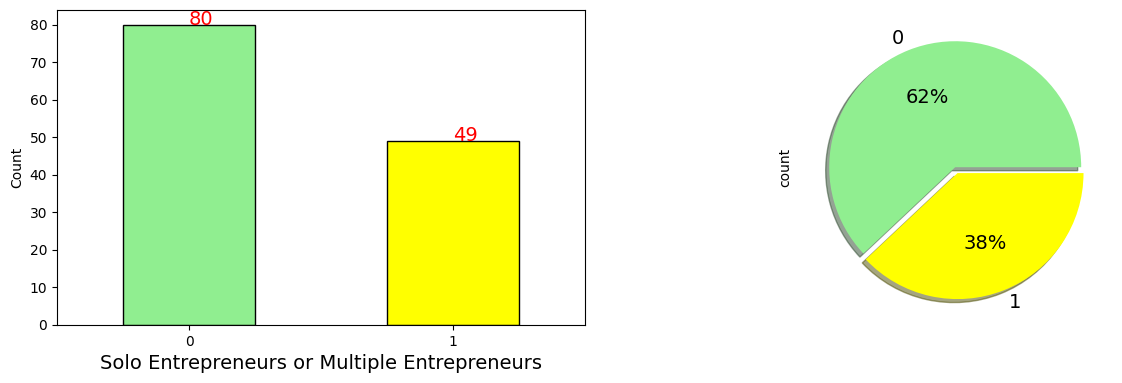

In [74]:
# Solo or multiple Entrepreneurs ?
print(dragons_den['Multiple Entrepreneurs'].value_counts(), "\n")
print(round(dragons_den['Multiple Entrepreneurs'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
dragons_den["Multiple Entrepreneurs"].value_counts().plot(kind='bar', color=["lightgreen","yellow"], ec="k")
plt.xlabel("Solo Entrepreneurs or Multiple Entrepreneurs", size=14)
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(dragons_den["Multiple Entrepreneurs"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="red")
    
ax2 = plt.subplot(222)
dragons_den["Multiple Entrepreneurs"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["lightgreen","yellow"], shadow=True, fontsize=14)

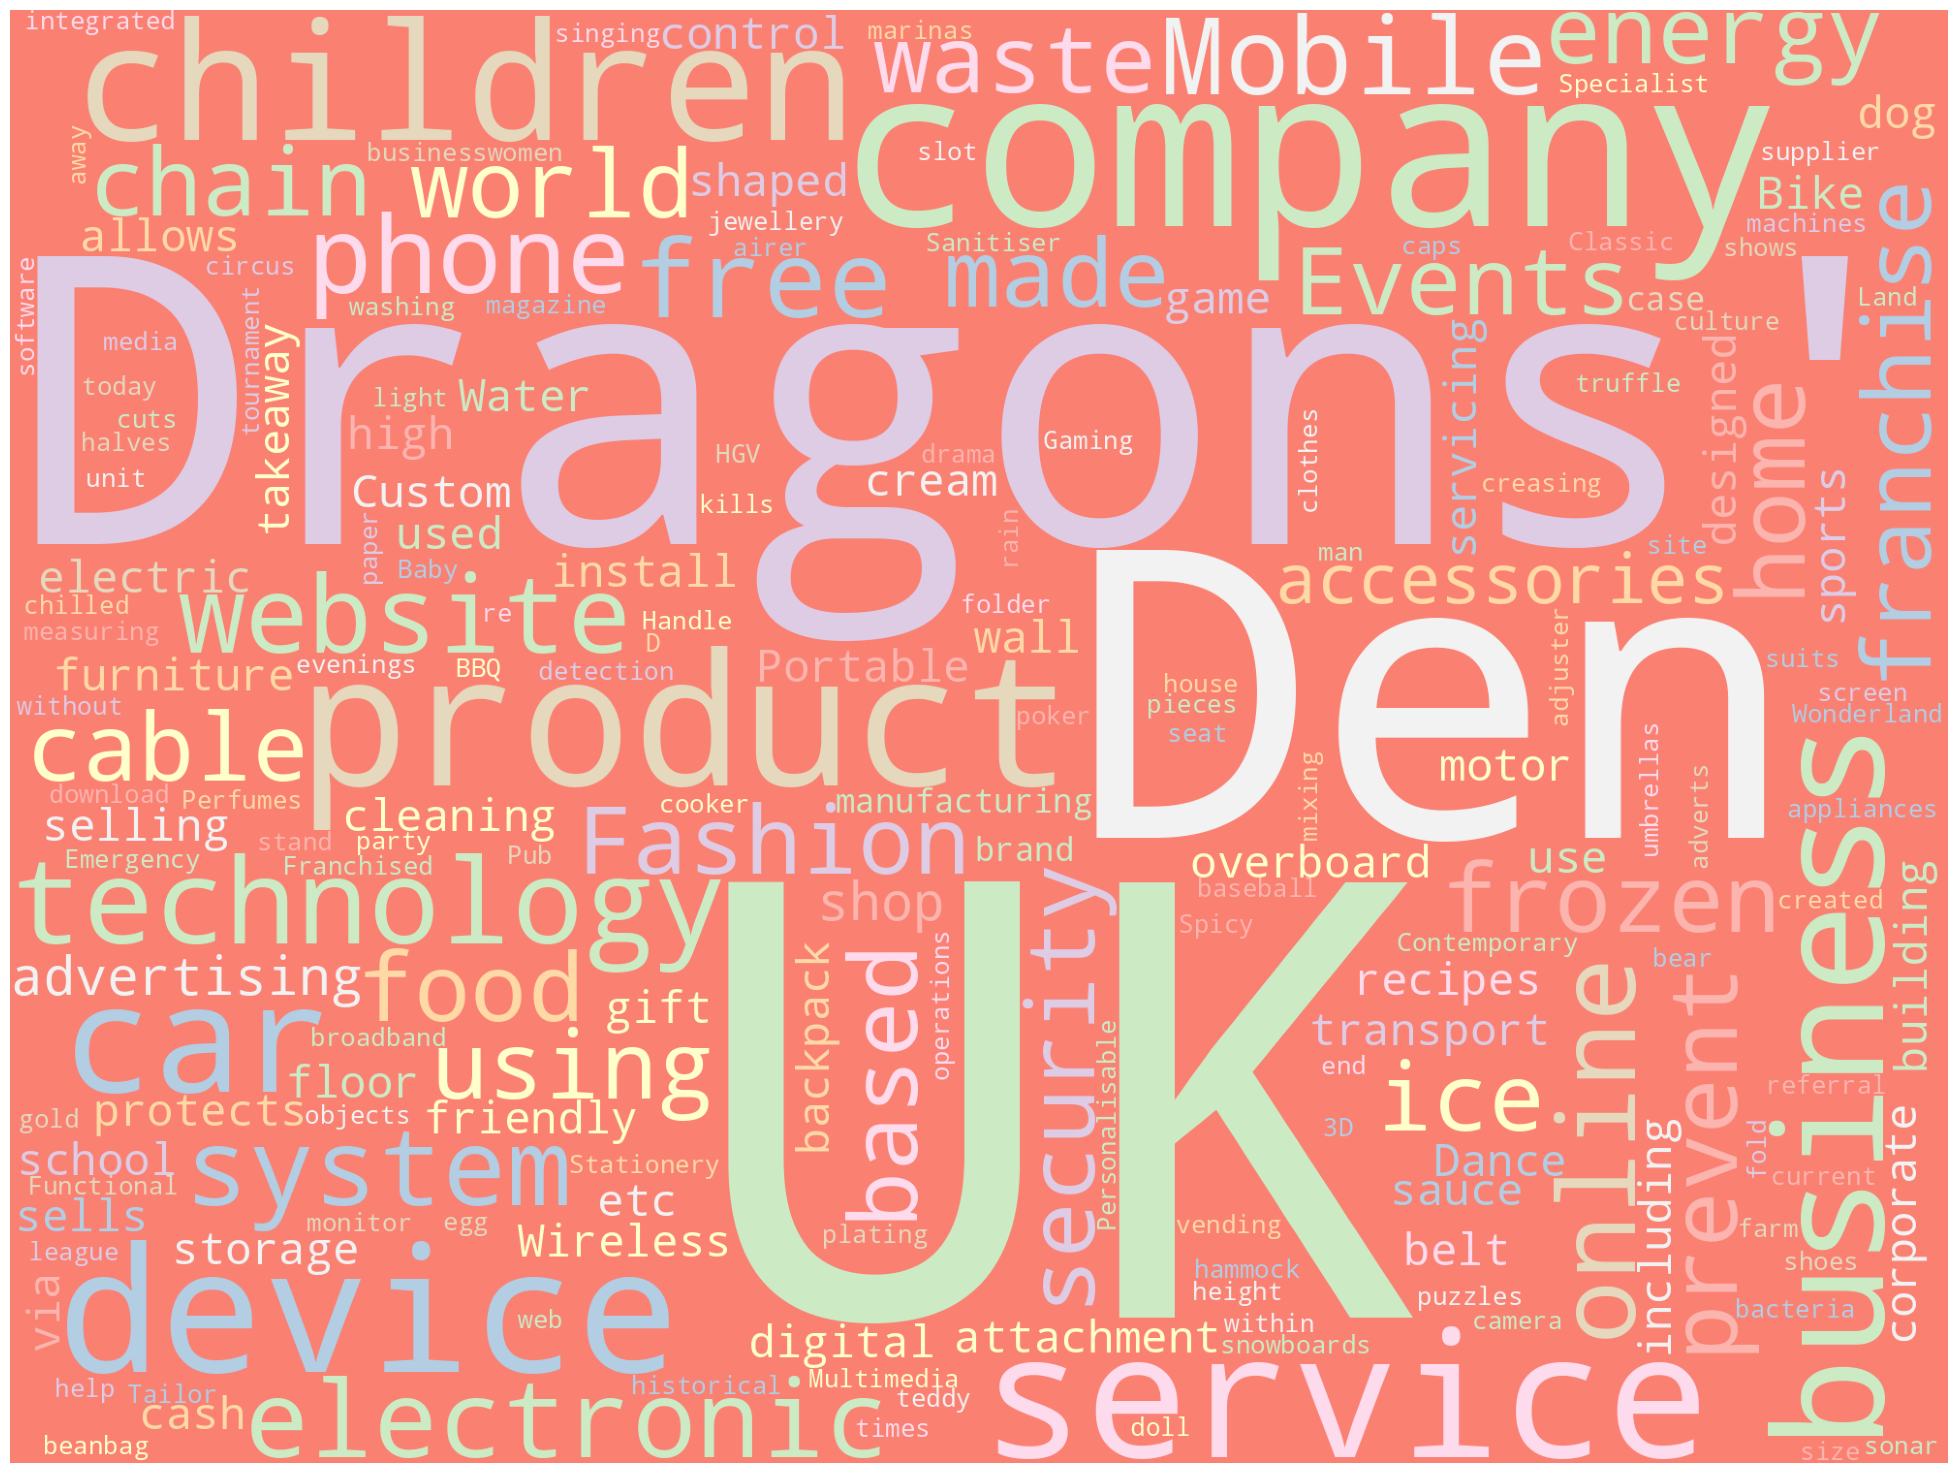

In [75]:
# Word cloud based on Business Description of startups came in all seasons
text = " Dragons' Den UK ".join(cat for cat in dragons_den.loc[dragons_den['Business Description'].notnull()]['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel1', collocations=False, random_state=2024).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [76]:
# Correlation matrix
dragons_den.corr(numeric_only=True).style.background_gradient(cmap = 'Blues')

In [77]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current Python package versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.7.5
# seaborn version: 0.12.2
# plotly version: 5.18.0

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.7.5
seaborn version: 0.12.2
plotly version: 5.18.0


In [78]:
dragons_den.loc[(dragons_den['Got Deal'] == 1) & (dragons_den['Total Deal Amount'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [79]:
dragons_den.loc[(dragons_den['Got Deal'] == 1) & (dragons_den['Total Deal Equity'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [80]:
dragons_den.loc[(dragons_den['Got Deal'] == 1) & (dragons_den['Deal Valuation'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [81]:
dragons_den.loc[(dragons_den['Got Deal'] == 1) & (dragons_den['Number of Dragons in Deal'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [82]:
dragons_den.loc[(dragons_den['Got Deal'] == 1) & (dragons_den['Investment Amount Per Dragon'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [83]:
dragons_den.loc[(dragons_den['Got Deal'] == 1) & (dragons_den['Equity Per Dragon'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [84]:
dragons_den.loc[round(dragons_den['Total Deal Amount'].fillna(0),1) != round(dragons_den['Peter Jones Investment Amount'].fillna(0) + dragons_den['Deborah Meaden Investment Amount'].fillna(0) + dragons_den['Duncan Bannatyne Investment Amount'].fillna(0) + dragons_den['Theo Paphitis Investment Amount'].fillna(0) + dragons_den['Touker Suleyman Investment Amount'].fillna(0) + dragons_den['Sara Davies Investment Amount'].fillna(0) + dragons_den['Guest Investment Amount'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [85]:
dragons_den.loc[round(dragons_den['Total Deal Equity'].fillna(0),1) != round(dragons_den['Peter Jones Investment Equity'].fillna(0) + dragons_den['Deborah Meaden Investment Equity'].fillna(0) + dragons_den['Duncan Bannatyne Investment Equity'].fillna(0) + dragons_den['Theo Paphitis Investment Equity'].fillna(0) + dragons_den['Touker Suleyman Investment Equity'].fillna(0) + dragons_den['Sara Davies Investment Equity'].fillna(0) + dragons_den['Guest Investment Equity'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [86]:
dragons_den.loc[(dragons_den['Guest Investment Amount'].notnull()) & (dragons_den['Guest Name'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [87]:
dragons_den.loc[(dragons_den['Guest Investment Amount'].isnull()) & (dragons_den['Guest Name'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [88]:
dragons_den.loc[(dragons_den['Multiple Entrepreneurs'] != 0) & (dragons_den['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [89]:
dragons_den.loc[(dragons_den['Multiple Entrepreneurs'] == 0) & (dragons_den['Entrepreneur Names'].notnull() & dragons_den['Entrepreneur Names'].str.contains(' and'))]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [90]:
dragons_den.loc[(dragons_den['Multiple Entrepreneurs'] == 1) & (dragons_den['Entrepreneur Names'].str.contains(' and ')==False)]

Season Number                Startup Name  Episode Number  Pitch Number  \
17              3                      Dr Cap               5            18   
20              3                Coin Metrics               8            21   
22              4                       Igloo               1            23   
31              5            Beach Break Live               1            32   
34              5               Gaming Alerts               2            35   
43              5           JPM Eco Logistics               7            44   
45              5           Red Button Design               9            46   
47              6                     D4M Ltd               1            48   
51              6                  Buggy Boot               4            52   
54              6             Planit Products               5            55   
57              6                Blindsinabox               7            58   
58              6                    Tiny Box               7            59   
62              7                BassToneSlap               2            63   
64              7                 Lid Lifters               3            65   
65              7              Servicing Stop               3            66   
66              7      UK Commercial Cleaning               4            67   
67              7  KCO Inline Ice Skating Ltd               4            68   
68              7                MyDish.co.uk               5            69   
74              7                 Motor Mouse               8            75   
82              8                  WedgeWelly               5            83   
83              8            Peel Engineering               6            84   
85              8     SURVIVA â SURVIVA JAK               7            86   
86              8            The Wand Company               7            87   
94              9                 Love Da Pop               2            95   

   Season Start Season End Original Air Date                 Industry  \
17     3-Aug-06  21-Sep-06         31-Aug-06  Fitness/Sports/Outdoors   
20     3-Aug-06  21-Sep-06         21-Sep-06            Software/Tech   
22     7-Feb-06  21-Mar-07          7-Feb-06        Business Services   
31    15-Oct-07  25-Dec-07         15-Oct-07        Business Services   
34    15-Oct-07  25-Dec-07         22-Oct-07            Software/Tech   
43    15-Oct-07  25-Dec-07          3-Dec-07                      nan   
45    15-Oct-07  25-Dec-07         25-Dec-07                      nan   
47    21-Jul-08   8-Sep-08         21-Jul-08        Business Services   
51    21-Jul-08   8-Sep-08         11-Aug-08        Business Services   
54    21-Jul-08   8-Sep-08         18-Aug-08           Lifestyle/Home   
57    21-Jul-08   8-Sep-08          1-Sep-08           Lifestyle/Home   
58    21-Jul-08   8-Sep-08          1-Sep-08                      nan   
62    15-Jul-09   2-Sep-09         22-Jul-09                      nan   
64    15-Jul-09   2-Sep-09         29-Jul-09           Lifestyle/Home   
65    15-Jul-09   2-Sep-09         29-Jul-09                      nan   
66    15-Jul-09   2-Sep-09          5-Aug-09        Business Services   
67    15-Jul-09   2-Sep-09          5-Aug-09                      nan   
68    15-Jul-09   2-Sep-09         12-Aug-09            Software/Tech   
74    15-Jul-09   2-Sep-09          2-Sep-09                      nan   
82    14-Jul-10  13-Sep-10          9-Aug-10                      nan   
83    14-Jul-10  13-Sep-10         16-Aug-10              Electronics   
85    14-Jul-10  13-Sep-10         24-Aug-10                      nan   
86    14-Jul-10  13-Sep-10         24-Aug-10                      nan   
94    31-Jul-11   3-Oct-11          7-Aug-11                      nan   

                                 Business Description  Company Website  \
17               Chain of shops selling baseball caps              NaN   
20  Technology to monitor cash operations for slot... 

In [91]:
dragons_den.loc[(dragons_den['Got Deal'] != 0) & (dragons_den['Got Deal'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [92]:
dragons_den.loc[(dragons_den['Got Deal'] == 0) & (dragons_den['Total Deal Amount'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [93]:
dragons_den.loc[(dragons_den['Pitchers Gender'] == 'Mixed Team') & (dragons_den['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [94]:
dragons_den.loc[(dragons_den['Got Deal'] == 0) & (dragons_den['Guest Name'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [95]:
dragons_den.loc[dragons_den['Total Deal Amount'] < dragons_den["Loan"]]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]